Haojie Pan
CSPS 483
Prof. Avery
9/21/20

In [3]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


In [4]:
#question 1

#loading the dataset direclty from sklearn
boston = datasets.load_boston()

#print(boston.DESCR)
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target
target = pd.DataFrame(boston.target, columns=['MEDV'])
print(bos.head())
print(target.head())
#print(bos.describe())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


Text(0, 0.5, '"House prices in $1000"')

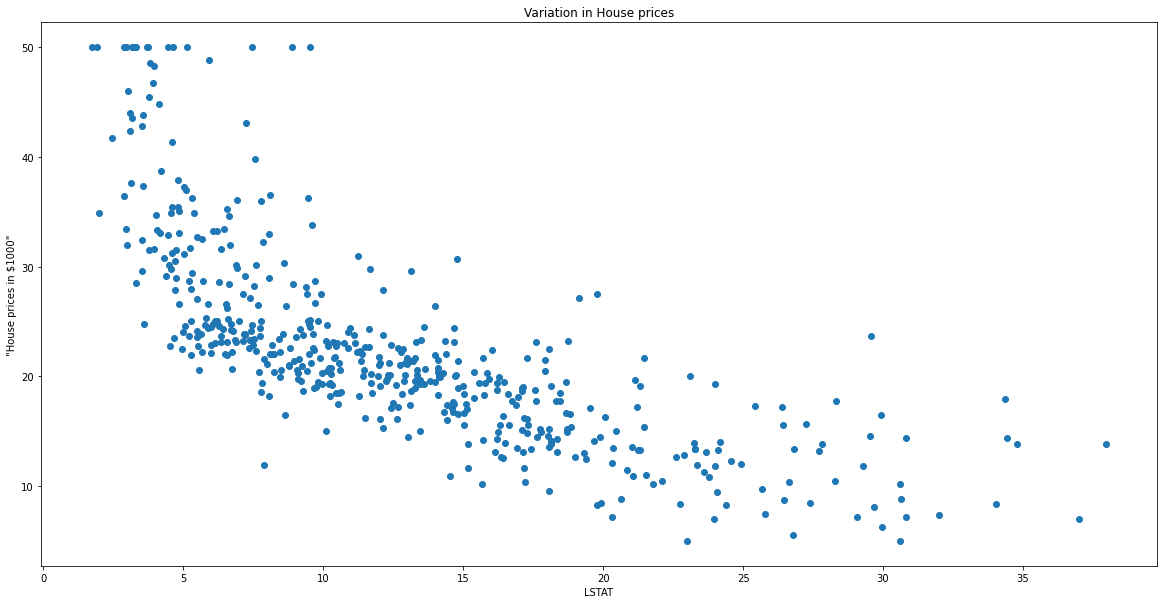

In [5]:
#question 2
x = bos['LSTAT']
y = bos['PRICE']
plt.figure(figsize=(20, 10))
plt.scatter(x, y, marker='o')
plt.title('Variation in House prices')
plt.xlabel('LSTAT')
plt.ylabel('"House prices in $1000"')

The ralation between LSTAT and MEDV does not appear to be linear. 

In [6]:
#question 3 

X = np.array(x).reshape([-1, 1])
Y = np.array(y)
lm = LinearRegression()
lm.fit(X, Y)

print(f'w0 = {lm.intercept_}')
print(f'w1 = {lm.coef_[0]}')

w0 = 34.55384087938311
w1 = -0.9500493537579909


Equation: Y = 34.55 - 0.95 * X

In [7]:
#question 4

Y_predict = lm.predict(X)
loss = mean_squared_error(Y, Y_predict)
print('loss: ', loss)



loss:  38.48296722989414


Text(0, 0.5, '"House prices in $1000"')

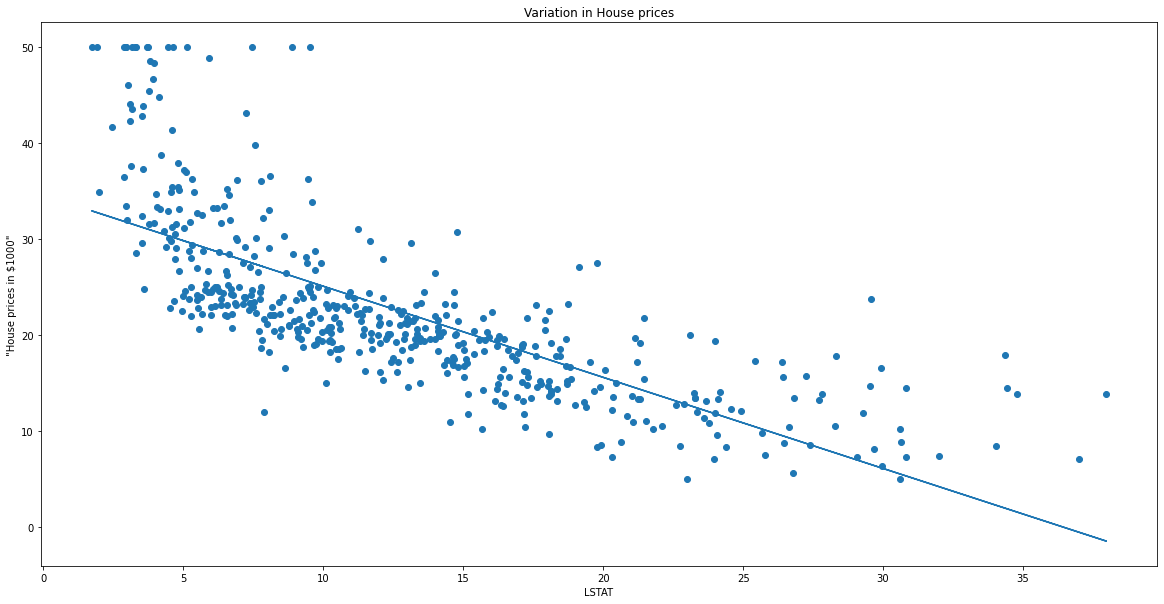

In [8]:
#question 5

plt.figure(figsize=(20, 10))
plt.scatter(x, y, marker='o')
plt.plot(X, Y_predict)
plt.title('Variation in House prices')
plt.xlabel('LSTAT')
plt.ylabel('"House prices in $1000"')


The model fits the data not perfect. It did not go through the most densed area. It took consider the outliars. 

In [12]:
#question 6 

x1 = bos.drop('PRICE', axis = 1)
y1 = bos['PRICE']
X1 = np.array(x1).reshape([-1, 13])
Y1 = np.array(y1)
lm = LinearRegression()
lm.fit(X1, Y1)

Y1_predict = lm.predict(X1)
loss = mean_squared_error(Y1, Y1_predict)
print("Loss: ", loss)


Loss:  21.894831181729206


The loss values are smaller than in question 4. 

In [10]:
#question 7

print(f'w0 = {lm.intercept_}')
print(f'w1 = {lm.coef_[0:]}')

w0 = 36.45948838509015
w1 = [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


 Desirable attributes: ZN, INDUS, CHAS, RM, AGE, RAD, B
 Undesirable attributes: CRIM, NOX, DIS, TAX, PTRATIO, LSTAT 

#question 8
      CRIM            ZN              INDUS           CHAS  
 -1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
      NOX               RM            AGE             DIS      
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
       RAD             TAX           PTRATIO           B        
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
      LSTAT
 -5.24758378e-01
 
  For crime rate increase in unit it will decrease the value by $108.01.
  For 'ZN' increase in unit it will increase the value by $46.42.
  For 'INDUS' increase in unit it will increase the value by $20.56.
  For 'CHAS' increase in unit it will increase the value by $2687.
  For 'NOX ' increase in unit it will decrease the value by $17760.
  For 'RM' increase in unit it will increase the value by $3810.
  For 'AGE' increase in unit it will increase the value by $0.692.
  For 'DIS' increase in unit it will decrease the value by $1475.
  For 'RAD' increase in unit it will increase the value by $306.0.
  For 'TAX' increase in unit it will decrease the value by $12.33.
  For 'PTRATIO' increase in unit it will decrease the value by $952.7.
  For 'B' increase in unit it will increase the value by $9.317.
  For 'LSTAT' increase in unit it will decrease the value by $524.8.

#question 9
The 'AGE' attibute is the least important. The following attibutes are not very imporant: 'ZN', 'INDUS', TAX'. 

Load and examine the Boston dataset’s features, target values, and description.
Create a scatterplot showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?
Create and fit() an sklearn.linear_model.LinearRegression model using LSTAT as a predictor of MEDV. Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a function of LSTAT?
Use the predict() method of the model to find the response for each value of the LSTAT attribute in the dataset. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the model.
Add a line to your scatter plot representing the least squares fit to the data. How well does the model fit the data?
Now repeat experiments (3) and (4) using all 13 input features at the same time. How does the average loss change?
Based on the coef_ attributes of the new model, which features are desirable in a home? Which features detract from its value?
Given the coef_ attributes, find the following for each feature: how much does a one unit increase in that feature change the median value of the home? Give your answer in dollars.
Based on the amount of change in the value of the home, which features don’t seem to be important?
